#### K-Means Algorithm Steps

In [1]:
# 1. Choose the value for K and 
# 2. Initialize centroids - random initialization 
# 3. Compute distances of each point with all other centroids and Assign cluster label to all points.
# 4. Recompute centroids of newly formed clusters. 
# 5. Repeat step 3 to 4 till we attain convergence (i.e., the centroids do not change much)

> Import necessary libraries and modules

In [2]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
# Load the dataset

data = sns.load_dataset("iris")
X = data[["sepal_length", "petal_length"]]


scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=["sepal_length", "petal_length"])
X.shape


(150, 2)

In [3]:
# Step1, Step 2: Choosing the value for K & initialize the centroids (random init)
K = 3

centroid_idxs = np.random.choice(X.index, K)
centroids = X.iloc[centroid_idxs]
centroids, centroid_idxs


(     sepal_length  petal_length
 110      0.611111      0.694915
 81       0.333333      0.457627
 130      0.861111      0.864407,
 array([110,  81, 130]))

In [4]:
# Step 3: Assigning the cluster label to all datapoints 

def euclidean_distance(c, x): 
    distance = np.sqrt((c[0] - x[0])**2 + (c[1] - x[1])**2)
    return distance

In [5]:
for iter in range(1000): 
    for row_idx, x in X.iterrows(): 
        x = tuple(x)

        clust_val = 1
        for idx, c in centroids.iterrows(): 
            c = tuple(c)
            X.loc[row_idx, f"cluster_dist_{clust_val}"] = euclidean_distance(c, x)
            clust_val = clust_val+1 
        cluster_distance_cols = X.filter(regex='cluster_dist_').columns.tolist()
        X["cluster_label"] = X[cluster_distance_cols].apply(lambda row: row.index[np.argmin(row)], axis=1)

    X["cluster_label"] = X["cluster_label"].map({"cluster_dist_1":1, "cluster_dist_2":2, "cluster_dist_3":3})
    centroids_updated = X.groupby(["cluster_label"])[["sepal_length", "petal_length"]].mean()
    change = np.sum([(centroids_updated.iloc[i] - centroids.iloc[i]) for i in range(0,3)])
    centroids = centroids_updated
    if change == 0:
        print ("iter:", iter)
        break

iter: 10


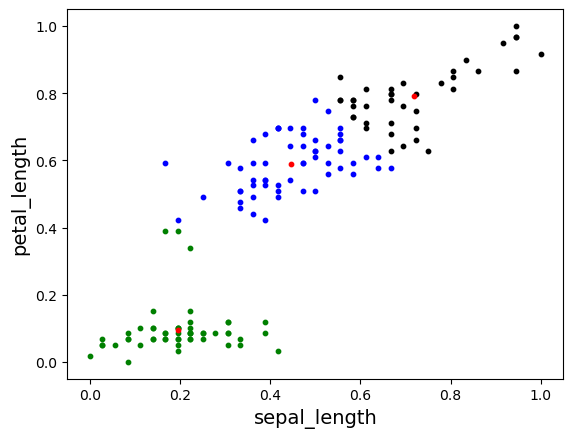

In [9]:
colors = ['b', 'g', 'k'] 

fig, ax = plt.subplots()

for cluster in range(K): 
    subset_data = X[X["cluster_label"]==cluster+1]
    ax.scatter(subset_data["sepal_length"], subset_data["petal_length"], s=10, color=colors[cluster])
ax.scatter(centroids["sepal_length"], centroids["petal_length"], s=10, color='r')
ax.set_xlabel("sepal_length", fontsize=14)
ax.set_ylabel("petal_length", fontsize=14)
plt.show()
